# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [165]:
print(f"The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts")

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [166]:
import time
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.calibration import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")

In [167]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [168]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [170]:
print("Business Objective - Given the client bank profile and direct marketing contact information, the goal is to predict whether a client will subscribe to a term deposit (yes or no).") 

Business Objective - Given the client bank profile and direct marketing contact information, the goal is to predict whether a client will subscribe to a term deposit (yes or no).


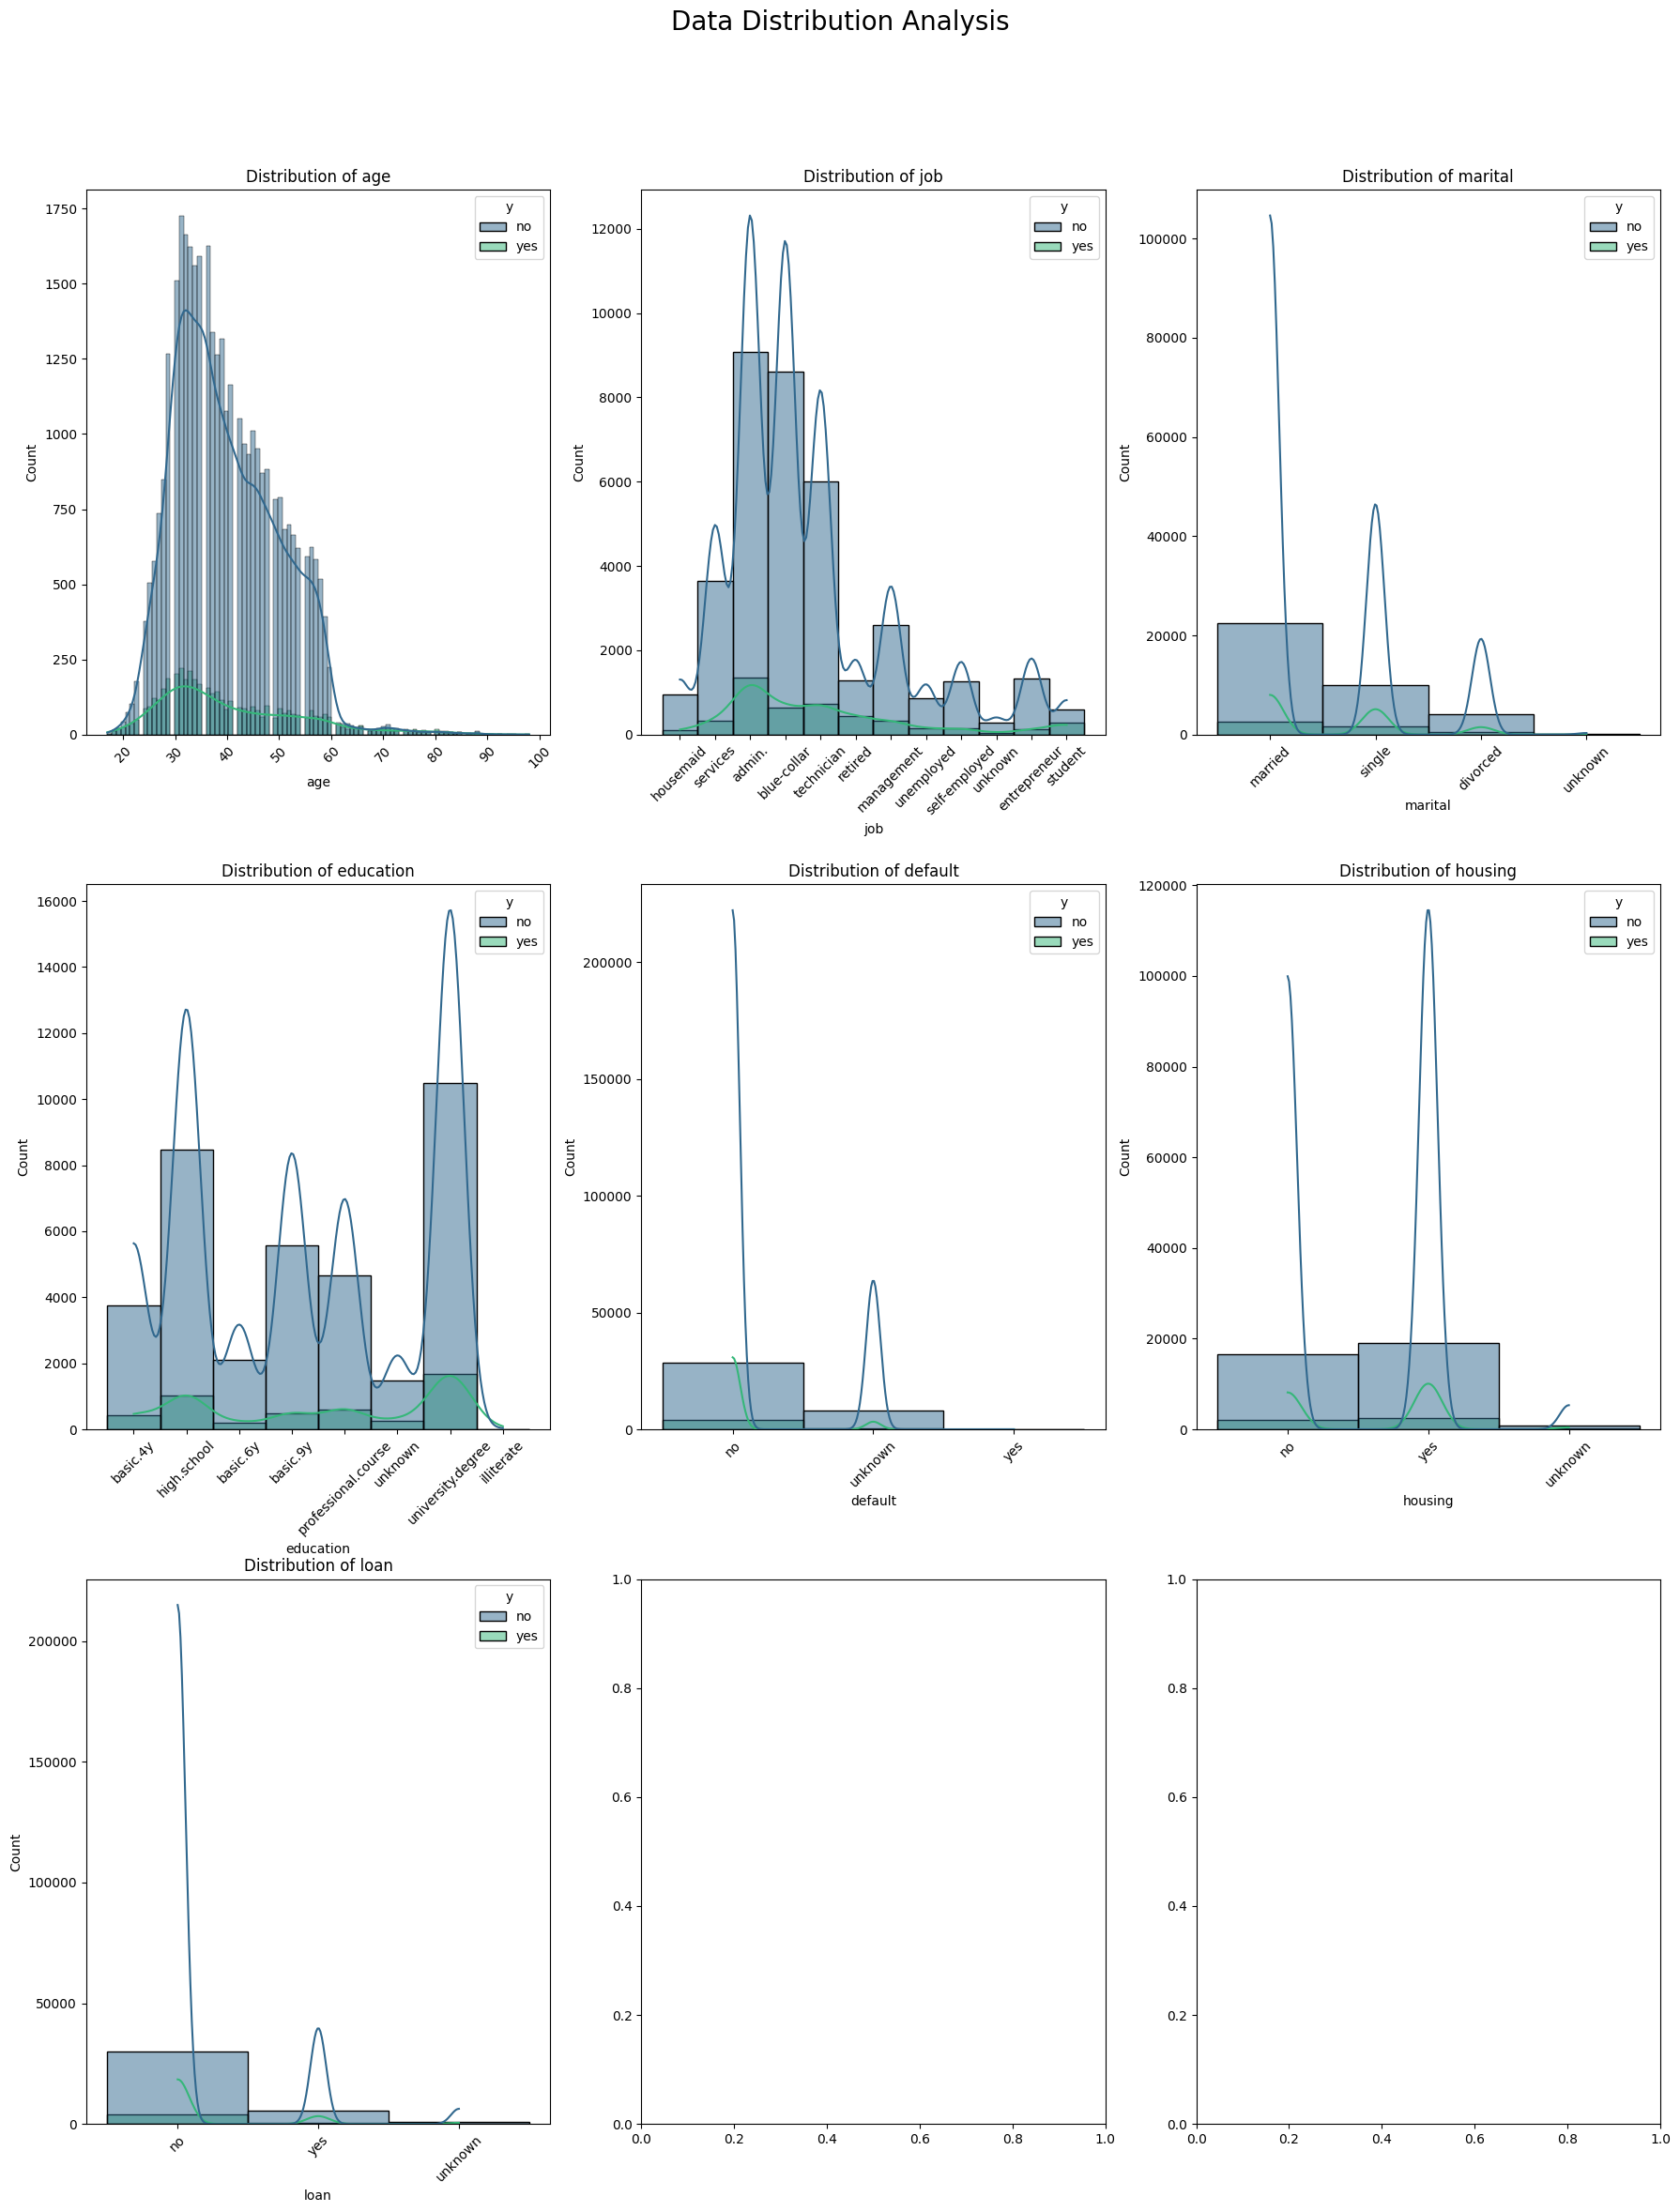

In [171]:
# Data Distribution Analysis
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 24))
axes = axes.flatten()

plt.suptitle('Data Distribution Analysis', fontsize=20)
for i, col in enumerate(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']):
    #ax = plt.subplot(3, 3, i + 1)
    sns.histplot(df, x=col, hue='y', kde=True, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', labelrotation=45)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig('images/data_distribution_analysis.png')

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [172]:
# Data Preprocessing
# Selecting relevant columns
df_bank_features =  df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]

# Convert categorical variables to numerical
df_bank_features.loc[:,['default', 'housing', 'loan', 'y']] = df_bank_features[['default', 'housing', 'loan', 'y']].apply(lambda x: x.map({'yes': 1, 'no': 0, 'unknown': None})).astype('bool')
df_bank_features.loc[:,['education']] = df_bank_features[['education']].apply(lambda x: x.map({'basic.4y': 'primary', 'basic.6y': 'middle', 'basic.9y': 'high', 'high.school': 'high', 'illiterate': 'illiterate', 'professional.course': 'professional', 'university.degree': 'university'}))

#Check for null values percentage in each column
null_percentages = (df_bank_features.isnull().sum() / len(df_bank_features)) * 100
print('% of null values in each column:')
print(null_percentages.sort_values(ascending=False))

# Drop rows with null values
df_bank_features = df_bank_features.dropna()

# Check the proportion of clients who subscribed to a term deposit
total_subscriptions=df_bank_features['y'].value_counts(normalize=True) * 100
print(f"Proportion of clients who subscribed to a term deposit: {total_subscriptions.iloc[1]:.2f}%")


% of null values in each column:
education    4.20268
age          0.00000
job          0.00000
marital      0.00000
default      0.00000
housing      0.00000
loan         0.00000
y            0.00000
dtype: float64
Proportion of clients who subscribed to a term deposit: 11.12%


In [173]:
# Split the data into features and target variable
X = df_bank_features.drop('y', axis=1)
y = df_bank_features['y']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [182]:
# Dummy Classifier for baseline comparison
dclf = DummyClassifier(random_state = 42)
dclf.fit(X_train, y_train)
score = dclf.score(X_test, y_test)

print(f"Dummy Classifier Score: {score:.4f}")

print(classification_report(y_test, dclf.predict(X_test), target_names=['Not Subscribed', 'Subscribed']))

Dummy Classifier Score: 0.8874
                precision    recall  f1-score   support

Not Subscribed       0.89      1.00      0.94     10965
    Subscribed       0.00      0.00      0.00      1392

      accuracy                           0.89     12357
     macro avg       0.44      0.50      0.47     12357
  weighted avg       0.79      0.89      0.83     12357



c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [176]:
# Create a column transformer for preprocessing
col_transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'), X.select_dtypes(include='object').columns), 
                                         remainder= StandardScaler() )

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', col_transformer),
    ('logreg', LogisticRegression())
])
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan'], dtype='object'))])),
                ('logreg', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [177]:
# Evaluate the model on training and test sets
train_score = pipeline.score(X_train, y_train)
print(f"Training Score: {train_score}")

test_score = pipeline.score(X_test, y_test)
print(f"Test Score: {test_score}")

params = pipeline.named_steps['logreg'].get_params()
print(f"Logistic Regression Parameters: {params}")

# Generate a classification report and confusion matrix
y_predTest = pipeline.predict(X_test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predTest, target_names=['Not Subscribed', 'Subscribed']))
print("Confusion Matrix (Test):")
print(confusion_matrix(y_test, y_predTest))

Training Score: 0.8887722220210724
Test Score: 0.8887480993411049
Logistic Regression Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribed       0.89      1.00      0.94     10521
    Subscribed       0.00      0.00      0.00      1317

      accuracy                           0.89     11838
     macro avg       0.44      0.50      0.47     11838
  weighted avg       0.79      0.89      0.84     11838

Confusion Matrix (Test):
[[10521     0]
 [ 1317     0]]


c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

knn - Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribed       0.89      0.98      0.93     10521
    Subscribed       0.23      0.05      0.09      1317

      accuracy                           0.87     11838
     macro avg       0.56      0.52      0.51     11838
  weighted avg       0.82      0.87      0.84     11838

logisticregression - Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

Classification Report (Test):


c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nagen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

                precision    recall  f1-score   support

Not Subscribed       0.89      1.00      0.94     10521
    Subscribed       0.00      0.00      0.00      1317

      accuracy                           0.89     11838
     macro avg       0.44      0.50      0.47     11838
  weighted avg       0.79      0.89      0.84     11838

svc - Parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribed       0.89      1.00      0.94     10521
    Subscribed       0.80      0.01      0.01      1317

      accuracy                           0.89     11838
     macro avg       0.84      0.50      0.48     11838
  weighted avg       0.88      0.89      0.84     

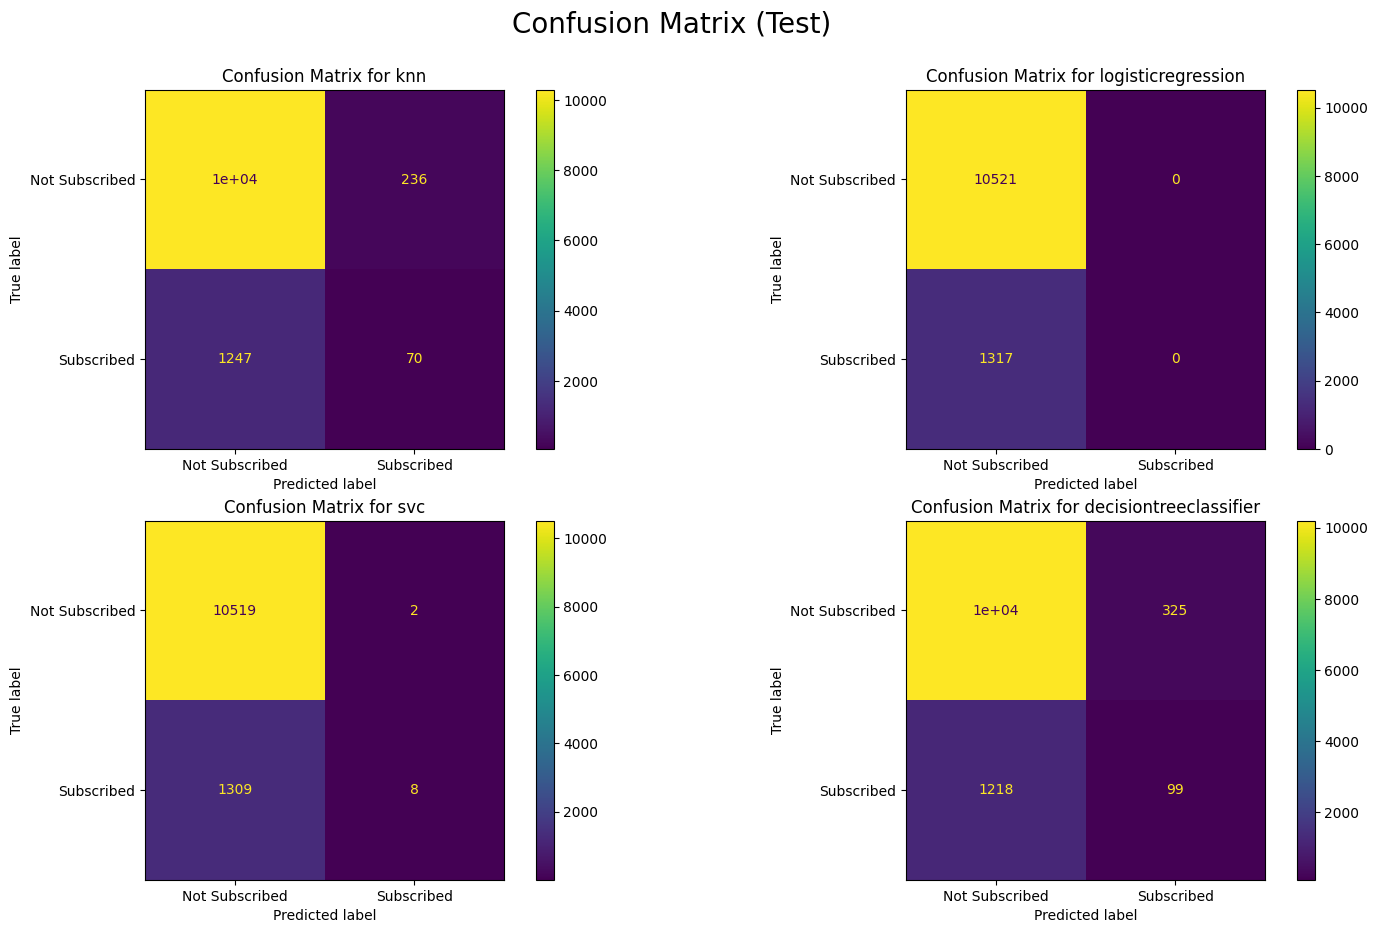

,Train Time,Train Accuracy,Test Accuracy
Model,,,
knn,0.080290,0.889677,0.874725
logisticregression,0.083323,0.888772,0.888748
svc,30.100244,0.889026,0.889255
decisiontreeclassifier,0.416562,0.913900,0.869657


In [178]:
# Define the models with defailt hyperparameters
models = {
    'knn': (KNeighborsClassifier()),
    'logisticregression': (LogisticRegression()),
    'svc': (SVC()),
    'decisiontreeclassifier': (DecisionTreeClassifier())
}

results = []
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(18, 10))
axes = axes.flatten()
plt.suptitle('Confusion Matrix (Test)', fontsize=20)
i=0
for name, model in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', col_transformer),
        (name, model)
    ])
    
    # Fit the model and time it
    start_time = time.time()
    pipeline.fit(X_train, y_train)
    fit_time = (time.time() - start_time)
    
    # Evaluate on training and test sets
    train_accuracy = accuracy_score(y_train, pipeline.predict(X_train))
    test_accuracy = accuracy_score(y_test, pipeline.predict(X_test))

    params = pipeline.named_steps[name].get_params()
    print(f"{name} - Parameters: {params}")

    # Generate classification report
    y_predTest = pipeline.predict(X_test)
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_predTest, target_names=['Not Subscribed', 'Subscribed']))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_predTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
    ax = axes.flat[i]
    ax.set_title(f'Confusion Matrix for {name}')
    disp.plot(ax=ax)
    i += 1

    # Append the results
    results.append([name, fit_time, train_accuracy, test_accuracy])

plt.subplots_adjust(top=0.9)
plt.savefig('images/confusion_matrix.png')
plt.show()

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)

results_df

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

knn - Parameters: {'knn__n_neighbors': 7}
logisticregression - Parameters: {'logisticregression__C': 10}
svc - Parameters: {'svc__C': 1, 'svc__kernel': 'rbf'}
decisiontreeclassifier - Parameters: {'decisiontreeclassifier__max_depth': 10}


,Train Time,Train Accuracy,Test Accuracy
Model,,,
knn,33.476453,0.891995,0.883173
logisticregression,0.266600,0.591730,0.597821
svc,85.184442,0.621239,0.609562
decisiontreeclassifier,0.438751,0.705022,0.685758


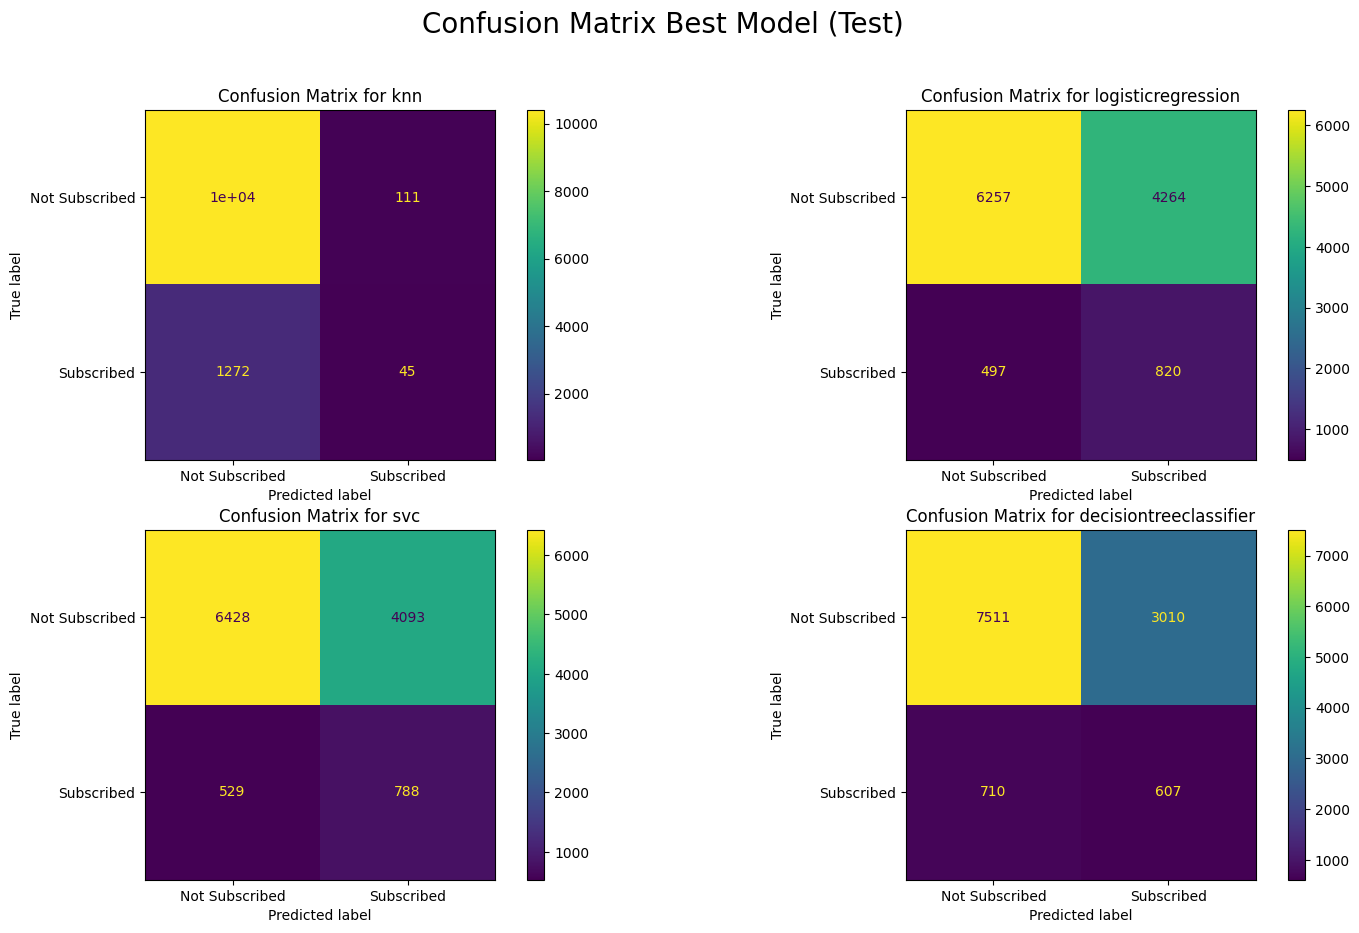

In [179]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000, class_weight='balanced'), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(class_weight='balanced'), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['rbf']}), #unable to use 'linear' kernel due to computational limits
    'decisiontreeclassifier': (DecisionTreeClassifier(class_weight='balanced'), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

results = []
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(18, 10))
axes = axes.flatten()
plt.suptitle('Confusion Matrix Best Model (Test)', fontsize=20)
i=0
for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', col_transformer),
        (name, model)
    ])
    
    # Fit the model and time it
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

    print(f"{name} - Parameters: {best_params}")
    
    # Generate confusion matrix
    y_predTest = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_predTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
    ax = axes.flat[i]
    ax.set_title(f'Confusion Matrix for {name}')
    disp.plot(ax=ax)
    i += 1

    # Append the results
    results.append([name, fit_time, train_accuracy, test_accuracy])

plt.savefig('images/confusion_matrix_optimized.png')

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)

# Save to JSON
results_df.to_json('results/model_results.json')

results_df

### Perform more Feature Engineering 

Model Score: 0.9005

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribed       0.91      0.99      0.95     10965
    Subscribed       0.70      0.21      0.32      1392

      accuracy                           0.90     12357
     macro avg       0.80      0.60      0.63     12357
  weighted avg       0.88      0.90      0.88     12357



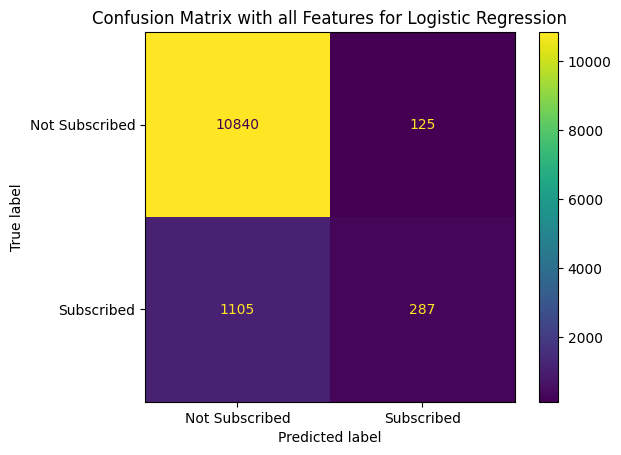

In [180]:
# Drop duration for realistic predictions
if "duration" in df.columns:
    df = df.drop(columns=["duration"], axis=1)

month_map = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,
             "jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
dow_map = {"mon":1,"tue":2,"wed":3,"thu":4,"fri":5}

# Convert month and day_of_week to numerical values
df.loc[:,['month']] = df['month'].map(month_map).fillna(df['month']).astype(int)
df.loc[:,['day_of_week']] = df['day_of_week'].map(dow_map).fillna(df['day_of_week']).astype(int)


numerical_features = [
    "age", "campaign", "previous",
    "pdays", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed", "month", "day_of_week"
]
categorical_features = [
    "job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"
]

# Create the preprocessing pipelines for both numerical and categorical data
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle any potential missing values
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle any potential missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Create a full pipeline with classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Split data into features and target variable
X = df.drop('y', axis=1)
y = df['y']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fitting the model
pipeline.fit(X_train, y_train)

# Scoring the model
score = pipeline.score(X_test, y_test)
print(f"Model Score: {score:.4f}")

# Generate classification report
y_predTest = pipeline.predict(X_test)
print("\nClassification Report (Test):")
print(classification_report(y_test, y_predTest, target_names=['Not Subscribed', 'Subscribed']))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_predTest)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])

disp.plot()
plt.title(f'Confusion Matrix with all Features for Logistic Regression')
plt.show()

knn - Parameters: {'knn__n_neighbors': 7}

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribed       0.91      0.98      0.94     10965
    Subscribed       0.61      0.28      0.38      1392

      accuracy                           0.90     12357
     macro avg       0.76      0.63      0.66     12357
  weighted avg       0.88      0.90      0.88     12357

logisticregression - Parameters: {'logisticregression__C': 10}

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribed       0.95      0.81      0.87     10965
    Subscribed       0.31      0.68      0.42      1392

      accuracy                           0.79     12357
     macro avg       0.63      0.74      0.65     12357
  weighted avg       0.88      0.79      0.82     12357

svc - Parameters: {'svc__C': 1, 'svc__kernel': 'rbf'}

Classification Report (Test):
                precision    recall  f1-score   support

Not Subscribe

,Train Time,Train Accuracy,Test Accuracy
Model,,,
knn,4.387369,0.907981,0.898276
logisticregression,0.955676,0.788179,0.791454
svc,122.895024,0.849918,0.850530
decisiontreeclassifier,1.333514,0.853803,0.855062


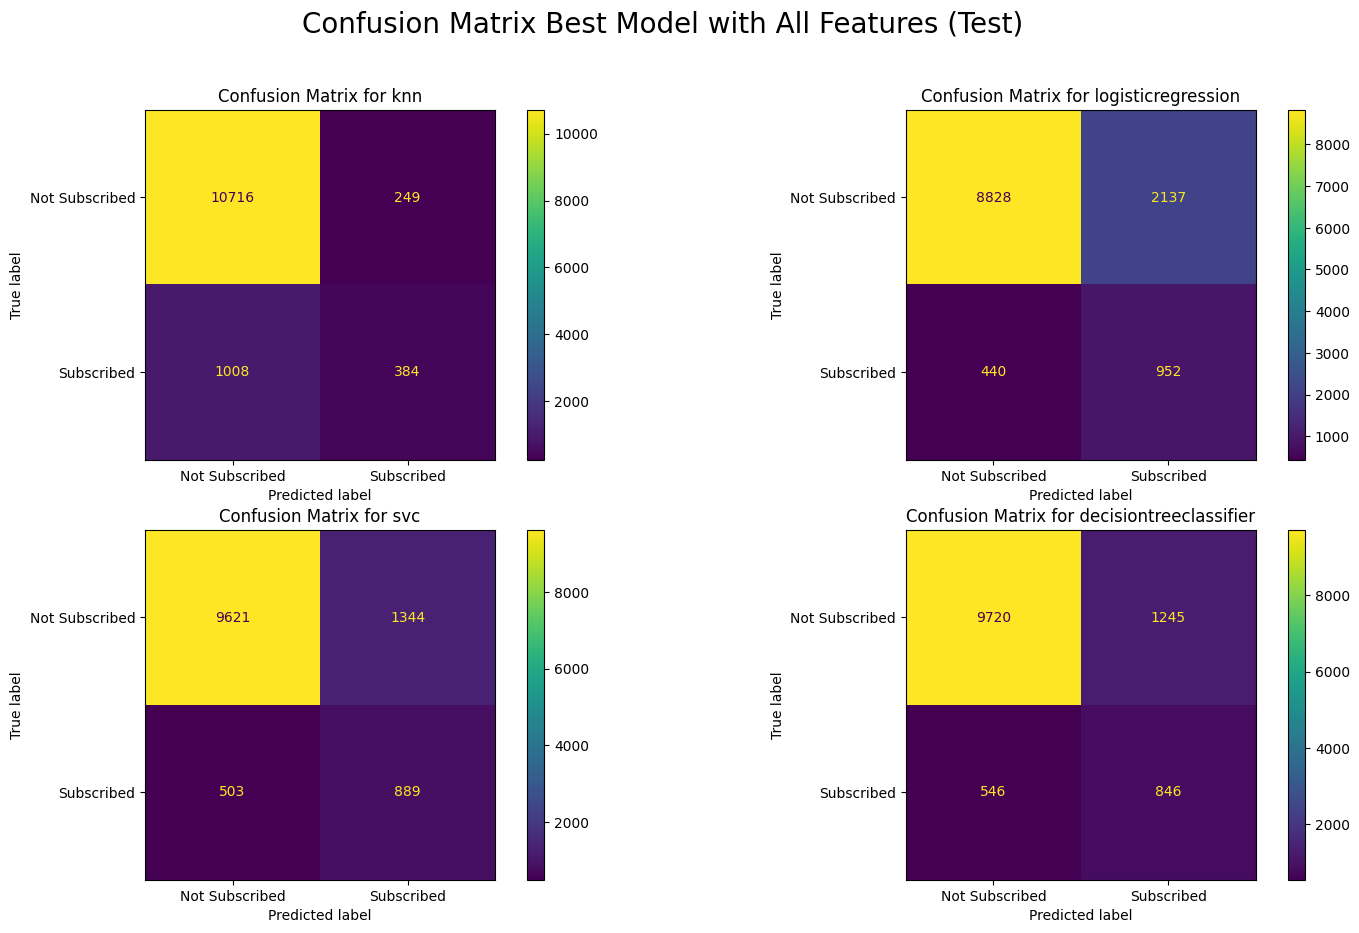

In [184]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000, class_weight='balanced'), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(class_weight='balanced'), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['rbf']}), #unable to use 'linear' kernel due to computational limits
    'decisiontreeclassifier': (DecisionTreeClassifier(class_weight='balanced'), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

bestModels ={}
results = []
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(18, 10))
axes = axes.flatten()
i=0
for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline(steps=[
       ('preprocessor', preprocessor),
       (name, model)
    ])

    # Fit the model and time it
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
    
    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    bestModels[name] = best_model

    train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

    print(f"{name} - Parameters: {best_params}")
    
    # Generate confusion matrix
    y_predTest = best_model.predict(X_test)

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_predTest, target_names=['Not Subscribed', 'Subscribed']))

    cm = confusion_matrix(y_test, y_predTest)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Subscribed', 'Subscribed'])
    ax = axes.flat[i]
    ax.set_title(f'Confusion Matrix for {name}')
    disp.plot(ax=ax)
    i += 1

    # Append the results
    results.append([name, fit_time, train_accuracy, test_accuracy])

plt.suptitle('Confusion Matrix Best Model with All Features (Test)', fontsize=20)
plt.savefig('images/confusion_matrix_all_features.png')

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
results_df.set_index('Model', inplace=True)

# Save to JSON
results_df.to_json('results/model_results_all_features.json')

results_df

### Optimize Decision Threshold

In [190]:
from sklearn.metrics import precision_recall_curve


logistic_pipeline = bestModels['logisticregression']

# Get the probabilities of the positive class for threshold adjustment
y_scores_logistic = logistic_pipeline.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds for the logistic model
precision_logistic, recall_logistic, thresholds_logistic = precision_recall_curve(y_test, y_scores_logistic)

# Find the optimal threshold, targeting a good balance of recall and precision
optimal_idx = np.argmax((recall_logistic * precision_logistic))
optimal_threshold = thresholds_logistic[optimal_idx]

# Adjust threshold for classification
y_pred_adjusted = (y_scores_logistic >= optimal_threshold).astype(int)

# Generate a classification report with the adjusted threshold
adjusted_report = classification_report(y_test, y_pred_adjusted, target_names=['Not Subscribed', 'Subscribed'])

print(adjusted_report)
optimal_threshold

                precision    recall  f1-score   support

Not Subscribed       0.94      0.91      0.92     10965
    Subscribed       0.43      0.56      0.48      1392

      accuracy                           0.87     12357
     macro avg       0.68      0.73      0.70     12357
  weighted avg       0.88      0.87      0.87     12357



np.float64(0.615330340407697)

In [191]:
# Extracting feature names from the preprocessor in the pipeline for categorical features
ohe_feature_names = list(logistic_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
                         .get_feature_names_out(categorical_features))

# Combine all feature names
all_feature_names = numerical_features + ohe_feature_names

# Extracting coefficients from the logistic regression model
coefficients = logistic_pipeline.named_steps['logisticregression'].coef_[0]

# Creating a DataFrame to view feature importances (coefficients)
feature_importance = pd.DataFrame({'Feature': all_feature_names, 'Coefficient': coefficients})

# Sorting features by the absolute values of their coefficients for better visualization
feature_importance_sorted = feature_importance.reindex(feature_importance.Coefficient.abs().sort_values(ascending=False).index)

feature_importance_sorted.head(10)

,Feature,Coefficient
4,emp.var.rate,-1.288733
5,cons.price.idx,0.594776
45,contact_telephone,-0.549076
31,education_illiterate,0.541585
7,euribor3m,0.522604
16,job_retired,0.447231
44,contact_cellular,0.431352
26,marital_unknown,0.421854
46,poutcome_failure,-0.348281
3,pdays,-0.272959


##### Questions